In [16]:
import os, sys, glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from utils import prepare_simulation, prepare_data

In [17]:
source_ra = 77.358 # degrees
source_dec = 5.693 # degrees

In [18]:
sim = prepare_simulation(source_ra, source_dec, # degrees
                           window = 5, # degrees
                           E0 = 1000, # GeV,
                           gamma = 2,
                           time_mean = 57000,
                           time_sigma = 100,
                           simfile = "/data/mjlarson/datasets/ps_tracks/version-003-p02/IC86_2012_MC.npy")

In [19]:
# And grab the data
data = prepare_data()

# Make your histograms. 

We'll use ra and dec binning here...

Text(0.5, 1.0, 'Data')

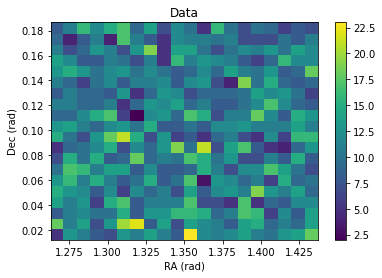

In [20]:
ra_bins = np.radians(np.linspace(source_ra-5, source_ra+5, 21))
dec_bins = np.radians(np.linspace(source_dec-5, source_dec+5, 21))

# And let's make some histograms!
fig, ax = plt.subplots()
data_hist, _, _, patches = ax.hist2d(data['ra'], data['dec'],
                                     bins = (ra_bins, dec_bins))
plt.colorbar(patches, ax=ax)
ax.set_xlabel("RA (rad)")
ax.set_ylabel("Dec (rad)")
ax.set_title("Data")

Text(0.5, 1.0, 'Simulated Source')

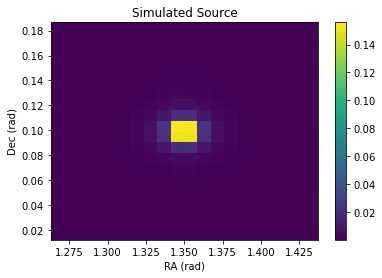

In [21]:
# And the same for simulation. Here, we need weights of some kind to
# tell us how often we expect to see each simulation event. We'll use
# the 'probability_weight' key here to give us a probability per bin.
fig, ax = plt.subplots()
signal_hist, _, _, patches = ax.hist2d(sim['ra'], sim['dec'],
                                       bins = (ra_bins, dec_bins),
                                       weights=sim['probability_weight'])
plt.colorbar(patches, ax=ax)
ax.set_xlabel("RA (rad)")
ax.set_ylabel("Dec (rad)")
ax.set_title("Simulated Source")

# What about background?

We'll also make a background histogram. This isn't terribly difficult to do, 
but it needs some explanation. First, we assume that our dataset is 
background-dominated. This is likely true: we see about 100,000 events/year 
while expecting << 1000 astrophysical neutrino events per year.

We also assume the background (atmospheric muons) are time-independent. This is 
not exactly true (rates vary by ~10% over a year), but it's pretty close. 

The right ascension (RA) values are calculated using a combination of the observed
azimuth of events crossing the detector and the time at which they were observed.
If we assume that the background is time-independent, then this converts to an 
assumption that the background events are uniformly distributed in RA. 

We can take advantage of our background-dominated and RA-uniformity assumptions
to build a PDF of our background. To do this, we'll take the distribution of events
in declination, scale it down by the total number of events in the histogram to get a
probability-per-declination bin. We divide by the number of `ra_bins` (less one, since
the array specifies the boundaries of the bins instead of centers) and reshape.

1.0 0.9835437333960666


<ipython-input-22-b19ddfac63af>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cmesh = ax.pcolormesh(ra_bins[:-1], dec_bins[:-1],


Text(0, 0.5, 'Dec (rad)')

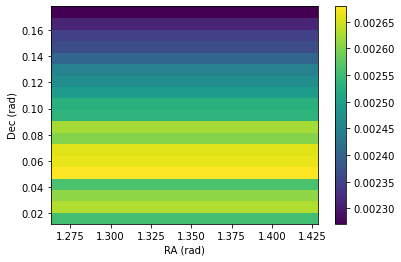

In [22]:
bg_hist = np.histogram(data['dec'], bins=dec_bins)[0] 
bg_hist = bg_hist/bg_hist.sum() / (len(ra_bins)-1)
bg_hist = bg_hist[None, :]*np.ones_like(data_hist)

print(bg_hist.sum(), signal_hist.sum())

# Plot it
fig, ax = plt.subplots()
cmesh = ax.pcolormesh(ra_bins[:-1], dec_bins[:-1],
                      bg_hist.T) # note the transpose here

plt.colorbar(cmesh, ax=ax)
ax.set_xlabel("RA (rad)")
ax.set_ylabel("Dec (rad)")